# Stima della distribuzione normale

Data una distribuzione $\mathcal{N}(x;\mu, \sigma)$ gli stimatori di stima di media e varianza a partire da $N$ campioni $x_i$ si ottengono come segue:

- $\hat{\mu}_N=\frac{1}{N}\sum\limits_{i=0}^{N}x_i$
- $\hat{\sigma}^2_N=\frac{1}{N}\sum\limits_{i=0}^{N}(x_i-\hat{\mu}_N)^2$

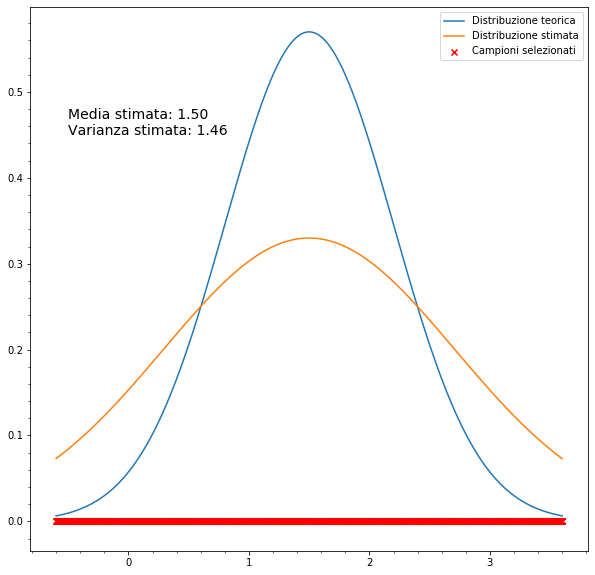

In [41]:
# Si consideri la distribuzione normale N(x;1.5,0.7)
import numpy as np
from numpy.random import default_rng
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import math

rg = default_rng()

num_data = 3000

mu, sigma = 1.5, 0.7

plt.figure(figsize=(10,10))

plt.minorticks_on()

# I dati sono campionati uniformemente nell'intervallo
data = rg.uniform(mu - 3 * sigma, mu + 3 * sigma, num_data)

# calcolo degli stimatori
mu_hat = np.sum(data)/num_data
sigma_hat = np.sum((data - mu_hat)**2)/num_data

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 300)

y = multivariate_normal([mu],[sigma**2])
y_hat = multivariate_normal([mu_hat],[sigma_hat])

plt.scatter(data,np.zeros((num_data,)),marker='x',c='r',label='Campioni selezionati')
plt.plot(x,y.pdf(x),label='Distribuzione teorica')
plt.plot(x,y_hat.pdf(x),label='Distribuzione stimata')

plt.text(-0.5,0.45,f'Media stimata: {mu_hat:4.2f}\nVarianza stimata: {sigma_hat:4.2f}',fontsize=14)

plt.legend()

plt.show()

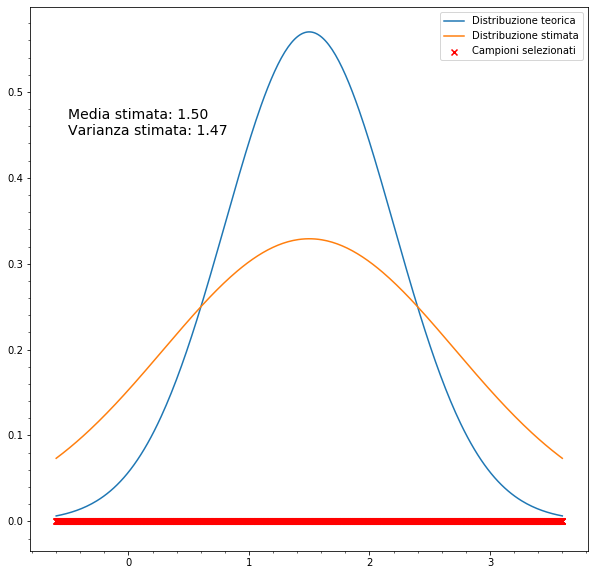

In [42]:
plt.figure(figsize=(10,10))

plt.minorticks_on()

# Eseguiamo il campionamento stratificato nell'intervallo
# con un campione per strato estratto con distribuzione uniforme
step = (6 * sigma)/num_data
start = mu - 3 * sigma

for i in range(num_data):
    data[i] = rg.uniform(start, start+step, 1)
    start += step

mu_hat = np.sum(data)/num_data
sigma_hat = np.sum((data - mu_hat)**2)/num_data

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 300)

y = multivariate_normal([mu],[sigma**2])
y_hat = multivariate_normal([mu_hat],[sigma_hat])

plt.scatter(data,np.zeros((num_data,)),marker='x',c='r',label='Campioni selezionati')
plt.plot(x,y.pdf(x),label='Distribuzione teorica')
plt.plot(x,y_hat.pdf(x),label='Distribuzione stimata')

plt.text(-0.5,0.45,f'Media stimata: {mu_hat:4.2f}\nVarianza stimata: {sigma_hat:4.2f}',fontsize=14)

plt.legend()

plt.show()

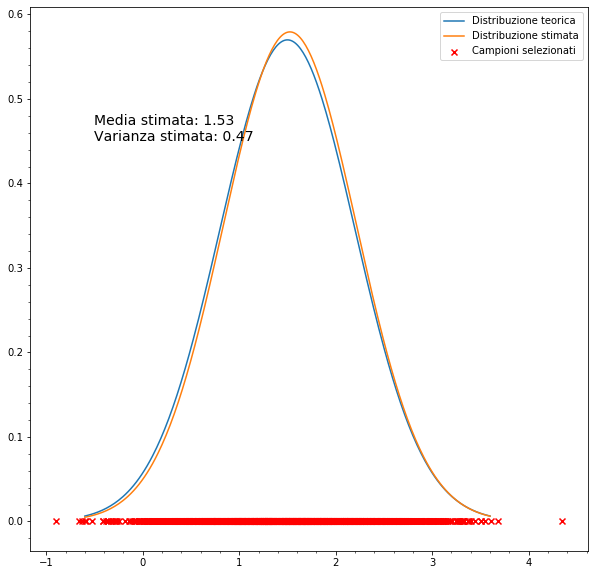

In [43]:
plt.figure(figsize=(10,10))

plt.minorticks_on()

# Eseguiamo il campionamento per importanza nell'intervallo
# utilizzando direttamente N(x;1.5,0.7) come funzione importanza
# Ovviamente questa stima è assolutamente ipotetica perché non
# conosciamo N in anticipo

data = rg.normal(mu, sigma, num_data)

mu_hat = np.sum(data)/num_data
sigma_hat = np.sum((data - mu_hat)**2)/num_data

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 300)

y = multivariate_normal([mu],[sigma**2])
y_hat = multivariate_normal([mu_hat],[sigma_hat])

plt.scatter(data,np.zeros((num_data,)),marker='x',c='r',label='Campioni selezionati')
plt.plot(x,y.pdf(x),label='Distribuzione teorica')
plt.plot(x,y_hat.pdf(x),label='Distribuzione stimata')

plt.text(-0.5,0.45,f'Media stimata: {mu_hat:4.2f}\nVarianza stimata: {sigma_hat:4.2f}',fontsize=14)

plt.legend()

plt.show()

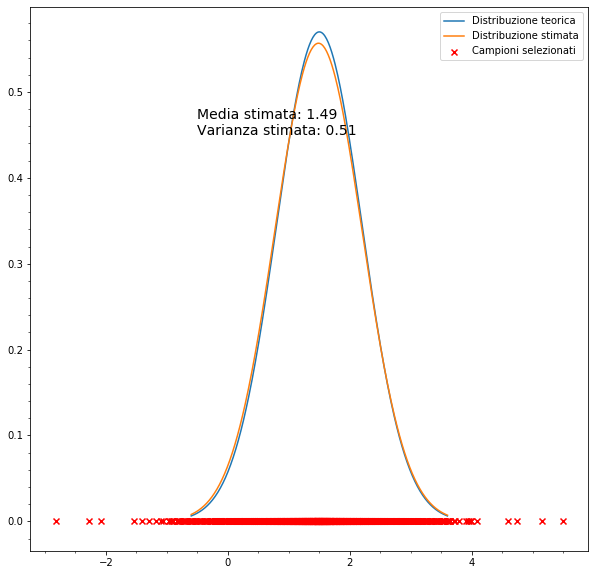

In [45]:
plt.figure(figsize=(10,10))

plt.minorticks_on()

# Eseguiamo il campionamento per importanza nell'intervallo
# utilizzando una distribuzione di Laplace, centrata nella media
# stimata in forma stratificata, la quale agirà da "funzione importanza"
# che approssima il comportamento della distribuzione cercata
step = (6 * sigma)/num_data
start = mu - 3 * sigma

for i in range(num_data):
    data[i] = rg.uniform(start, start+step, 1)
    start += step

mu_importance = np.sum(data)/num_data

data = rg.laplace(mu_importance, scale=0.5, size=num_data)

mu_hat = np.sum(data)/num_data
sigma_hat = np.sum((data - mu_hat)**2)/num_data

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 300)

y = multivariate_normal([mu],[sigma**2])
y_hat = multivariate_normal([mu_hat],[sigma_hat])

plt.scatter(data,np.zeros((num_data,)),marker='x',c='r',label='Campioni selezionati')
plt.plot(x,y.pdf(x),label='Distribuzione teorica')
plt.plot(x,y_hat.pdf(x),label='Distribuzione stimata')

plt.text(-0.5,0.45,f'Media stimata: {mu_hat:4.2f}\nVarianza stimata: {sigma_hat:4.2f}',fontsize=14)

plt.legend()

plt.show()